In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load science-ready dataset
df = pd.read_csv("exoplanets_science_ready.csv")

Observed Counts:
in_habitable_zone  False  True 
composition                    
Gaseous             4573     85
Rocky               1100     30

Chi-Squared Test Results
Chi2 Statistic = 2.8053
Degrees of Freedom = 1
p-value = 0.093955

Expected Counts:
in_habitable_zone    False  True 
composition                      
Gaseous            4565.45  92.55
Rocky              1107.55  22.45

Effect Size (Cramér's V) = 0.022
Association Strength: Negligible


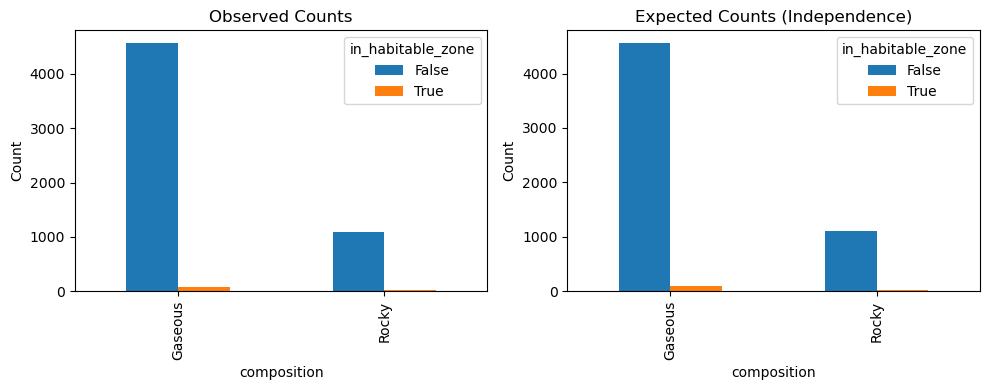

In [2]:
# -----------------------------
# Recreate analytical strata
# -----------------------------

HZ_LOWER = 0.25
HZ_UPPER = 1.75
ROCKY_THRESHOLD = 1.6

df = df.copy()

df["in_habitable_zone"] = (
    (df["insolation_flux_earth_flux"] >= HZ_LOWER) &
    (df["insolation_flux_earth_flux"] <= HZ_UPPER)
)

df["composition"] = np.where(
    df["planet_radius_earth_radius"] < ROCKY_THRESHOLD,
    "Rocky",
    "Gaseous"
)

# -----------------------------
# Contingency Table
# -----------------------------

contingency = pd.crosstab(df["composition"], df["in_habitable_zone"])
print("Observed Counts:")
print(contingency)

# -----------------------------
# Chi-Squared Test
# -----------------------------

chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("\nChi-Squared Test Results")
print("Chi2 Statistic =", round(chi2, 4))
print("Degrees of Freedom =", dof)
print("p-value =", round(p, 6))

expected_df = pd.DataFrame(
    expected,
    index=contingency.index,
    columns=contingency.columns
)

print("\nExpected Counts:")
print(expected_df.round(2))

# -----------------------------
# Effect Size: Cramér's V
# -----------------------------

n = contingency.to_numpy().sum()
min_dim = min(contingency.shape) - 1

cramers_v = np.sqrt(chi2 / (n * min_dim))

print("\nEffect Size (Cramér's V) =", round(cramers_v, 4))

# Interpretation guidance
if cramers_v < 0.1:
    strength = "Negligible"
elif cramers_v < 0.3:
    strength = "Weak"
elif cramers_v < 0.5:
    strength = "Moderate"
else:
    strength = "Strong"

print("Association Strength:", strength)

# -----------------------------
# Visualization: Observed vs Expected
# -----------------------------

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

contingency.plot(kind="bar", ax=axes[0])
axes[0].set_title("Observed Counts")
axes[0].set_ylabel("Count")

expected_df.plot(kind="bar", ax=axes[1])
axes[1].set_title("Expected Counts (Independence)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()